In [213]:
#import the required librarys
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeRegressor

In [214]:
# Path directory for the file
dataset_file_path =r'I:\Rworkshop\UniversalBank.csv'

In [215]:
# Reading the csv file into a  pandas Data frame
ubdata_set=pd.read_csv(dataset_file_path)
ubdata_set.rename(columns={"ZIP Code":'ZIP_Code',"Personal Loan":"Personal_Loan"},inplace = True)

In [216]:
#displaying descriptive data of attributes/:
ubdata_set.head()
ubdata_set.columns
ubdata_set.shape
ubdata_set.describe()

,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [217]:
# Removing the unwanted columns
ubdata_set2=ubdata_set.drop({"ZIP_Code","ID"},axis=1)

In [218]:
# Searching for null values
ubdata_set.isna().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP_Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [219]:
#COPYING THE VARIABLES
ubdata_set3= ubdata_set.copy()
ubdata_set3 = pd.get_dummies(ubdata_set3,columns = ['Education'])

In [220]:
# spliting the data
predictor =np.array(ubdata_set3.iloc[:,1:11]) 
target = np.array(ubdata_set3.Personal_Loan)
x_train, x_validation , y_train, y_validation = train_test_split(predictor,target, test_size=0.4,random_state=24)
print (y_train)

[1 1 0 ... 0 0 1]


In [221]:
#Normalising the data
dfnormalize= preprocessing.normalize(ubdata_set3)
print(type(dfnormalize))
print(ubdata_set2.columns)
normal_df=pd.DataFrame(dfnormalize, columns=ubdata_set3.columns)
normal_df.describe()

<class 'numpy.ndarray'>
Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')


,ID,Age,Experience,Income,ZIP_Code,Family,CCAvg,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.026835,0.000488,0.000216,0.000792,0.999518,0.000026,0.000021,0.000606,0.000001,0.000001,6.471612e-07,0.000006,0.000003,0.000004,0.000003,0.000003
std,0.015489,0.000142,0.000128,0.000495,0.000430,0.000014,0.000019,0.001092,0.000003,0.000003,2.553238e-06,0.000005,0.000005,0.000005,0.000005,0.000005
min,0.000011,0.000241,-0.000033,0.000084,0.998462,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.013412,0.000380,0.000108,0.000416,0.999190,0.000011,0.000007,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.026773,0.000487,0.000217,0.000680,0.999640,0.000022,0.000017,0.000000,0.000000,0.000000,0.000000e+00,0.000011,0.000000,0.000000,0.000000,0.000000
75%,0.040211,0.000592,0.000319,0.001054,0.999908,0.000033,0.000027,0.001081,0.000000,0.000000,0.000000e+00,0.000011,0.000011,0.000011,0.000011,0.000011
max,0.055438,0.005475,0.002684,0.002382,1.000000,0.000429,0.000109,0.006916,0.000011,0.000011,1.110834e-05,0.000107,0.000107,0.000011,0.000011,0.000107


In [222]:
#giving k=7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [223]:
# predicting and validating
pred_validation = knn.predict(x_validation)
pred_train = knn.predict(x_train)

In [224]:
# finding accuracy for the model k=7
accuracy_score = accuracy_score(y_validation, pred_validation) * 100
accuracy_score

90.35

In [225]:
#Testing the data
test_data =  pd.DataFrame({ 'Age':40, 'Experience':10, 'Income':84, 'Family':2, 'CCAvg':2,
                           'Education':[0,1,0], 'Mortgage':0, 'Securities Account':0,'CD Account':0,
                           'Online':1, 'CreditCard':1})

In [249]:
#Normalizing the data
testdata2= preprocessing.normalize(test_data)
normaltest=pd.DataFrame(testdata2)
normaltest.describe()
normaltest.columns =['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
#predicting the test case1
test_predict1 = classifier.predict(x_train)
print(test_predict1)

[0 0 0 ... 0 0 0]


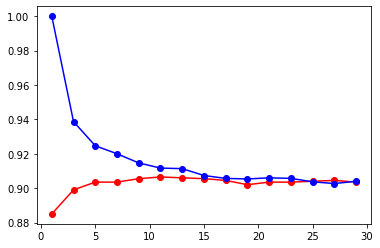

In [227]:
#finding the best k  and worst k using graph

acc = []
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    test_acc = np.mean(knn.predict(x_validation) == y_validation)
    train_acc = np.mean(knn.predict(x_train) == y_train)
    acc.append([test_acc,train_acc])
    #print(acc)


import matplotlib.pyplot as plt
plt.plot(np.arange(1,30,2),[i[0] for i in acc],"ro-")
plt.plot(np.arange(1,30,2),[i[1] for i in acc],"bo-")

In [228]:
#confusion matrix
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)


confusion_matrix(y_train, pred_train)


array([[2674,   37],
       [ 203,   86]], dtype=int64)

In [245]:
# testing the data2
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
testcase2 =  pd.DataFrame({ 'Age':40, 'Experience':10, 'Income':84, 'Family':2, 'CCAvg':2,'Education':[0,1,0], 'Mortgage':0, 'Securities Account':0,'CD Account':0, 'Online':1, 'CreditCard':1})

#Normalizing the data
from sklearn.preprocessing import normalize
testcase_norm2 = preprocessing.normalize(test_data2)

testcase_norm2= pd.DataFrame(testcase_norm2)

testcase_norm2.columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

#Predicting the test case2 
test_predict2 = classifier.predict(x_train)
print(test_predict2)

[0 0 0 ... 0 0 0]


In [238]:
# Splitting the data in training(50%), validation(30%),and test(20%) sets
train_df,temp_df = train_test_split(ubdata_set2, test_size=0.5, random_state=24)
valid_df, test_df = train_test_split(temp_df, test_size=0.4, random_state=24)
print('Training data', train_df.shape)
print('Validation data', valid_df.shape)
print('Test data', test_df.shape)

Training data (2500, 12)
Validation data (1500, 12)
Test data (1000, 12)


In [239]:
predictor =np.array(ubdata_set3.iloc[:,1:11]) 
target = np.array(ubdata_set3.Personal_Loan)
x_train, x_validation , y_train, y_validation = train_test_split(predictor,target, test_size=0.4,random_state=24)
print (y_train)

[0 0 0 ... 0 1 0]


In [241]:
 # fitting the data for the best K value (17)
classifier = KNeighborsClassifier(n_neighbors=17)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [257]:
#Confusion Matrix for training data
knn = classifier.predict(x_train)
print(confusion_matrix(y_train, knn))

[[2695   22]
 [ 249   34]]
